### In the MNIST dataset, each image is represented as a 1D array of size 784 (28x28). Each pixel in the image has a value between 0 and 255, representing the grayscale value of the pixel.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('sample_data/mnist_train_small.csv')


In [ ]:
data.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# rename column 6 to 'label'
df = data.copy()
df.rename(columns={'6': 'label'},inplace=True)
df.head(3)

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data = pd.read_csv('sample_data/mnist_test.csv')
df_test = test_data.copy()
df_test.rename(columns={'7': 'label'},inplace=True)

df_test.head(20)

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# ".values" attr stores it in array rather than dataframe
df_constrained = df[(df['label'] == 0) | (df['label'] == 1)]
X, y = df_constrained.iloc[:,1:].values ,df_constrained.iloc[:,0].values

constrained_test = df_test[(df_test['label'] == 0) | (df_test['label'] == 1)]
X_test, y_test = constrained_test.iloc[:,1:].values ,constrained_test.iloc[:,0].values

In [ ]:
X.shape

(4205, 784)

> only include class 0 and class 1 of df.

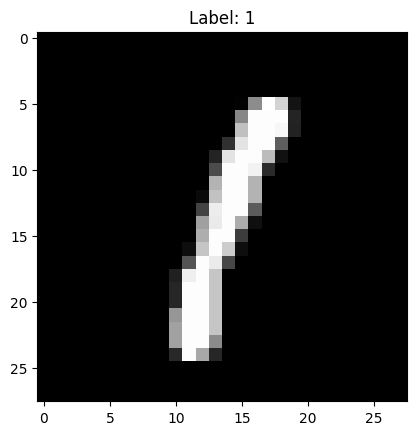

In [ ]:
# select a sample image
sample_idx = 2
# reshape the 1D array into a 2D array with 28 rows and 28 columns
sample_image = X[sample_idx].reshape(28, 28)

# plot the sample image
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {y[sample_idx]}')
plt.show()

### Standarize

In [ ]:
def standrize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

X = standrize(X)
X_test = standrize(X_test)

<ipython-input-10-cfab536328b6>:2: RuntimeWarning: invalid value encountered in true_divide
  return (x - np.mean(x, axis=0)) / np.std(x, axis=0)


### K-fold cross validation

In [ ]:
def kfold(X, y, k):
    n_samples = X.shape[0]
    fold_size = n_samples // k

    # Shuffle the data
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    # Split data into k folds
    folds_X = np.array_split(X, k)
    folds_y = np.array_split(y, k)

    # Loop through each fold and use it as the validation set
    for i in range(k):
        val_fold_X = folds_X[i]
        val_fold_y = folds_y[i]

        # Concatenate all folds except the validation fold to create the training set
        train_folds_X = np.concatenate([fold for j, fold in enumerate(folds_X) if j != i])
        train_folds_y = np.concatenate([fold for j, fold in enumerate(folds_y) if j != i])

        yield train_folds_X, train_folds_y, val_fold_X, val_fold_y


### Logistic regression Model

In [ ]:
class logisticRegression:

  def __init__(self, lr, n_iters):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

   # sigmoid function maps any real number to the range (0,1)
  def _sigmoid(self,x):
    return(1/(1+np.exp(-x)))

  def fit(self,X,y):
    n_samples, n_features = X.shape
    #intialized as zero
    self.weights = np.zeros(n_features)
    self.bias = 0

    #gradient descent
    for _ in range(self.n_iters):
      linear_model = np.dot(X,self.weights) + self.bias
      y_pred = self._sigmoid(linear_model)

      dw = (1/n_samples) * np.dot(X.T,(y_pred-y))
      db = (1/n_samples) * np.sum(y_pred-y)

      self.weights -= self.lr *dw
      self.bias -= self.lr * db

  def predict(self,X):
    linear_model = np.dot(X,self.weights) + self.bias
    y_pred = self._sigmoid(linear_model)
    threshold = 0.5
    y_pred_class = np.where(y_pred > threshold, 1, 0)
    return y_pred_class


> small note : a threshold is a value that is used to convert a predicted probability into a class label.

In [ ]:
def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy

In [ ]:
# Set the learning rates & results storage
learning_rates = [ 0.001, 0.01, 0.05, 0.1, 0.2 , 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for learn_rate in learning_rates:
  # iterates through each fold generated by the kfold
  for X_train, y_train, X_val, y_val in kfold(X,y, k=10):
    model = logisticRegression(learn_rate, n_iters=10000)

    # train the model
    model.fit(X_train, y_train)

    # Make predictions on the validation set and compute the accuracy
    y_pred = model.predict(X_val)

    results_list.append((learn_rate, accuracy(y_val, y_pred)))

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)


    learning_rate  accuracy
0           0.001  0.467933
1           0.001  0.434679
2           0.001  0.448931
3           0.001  0.451306
4           0.001  0.479810
5           0.001  0.492857
6           0.001  0.447619
7           0.001  0.519048
8           0.001  0.488095
9           0.001  0.435714
10          0.010  0.456057
11          0.010  0.446556
12          0.010  0.467933
13          0.010  0.470309
14          0.010  0.489311
15          0.010  0.466667
16          0.010  0.483333
17          0.010  0.466667
18          0.010  0.469048
19          0.010  0.450000
20          0.050  0.472684
21          0.050  0.489311
22          0.050  0.422803
23          0.050  0.465558
24          0.050  0.463183
25          0.050  0.457143
26          0.050  0.450000
27          0.050  0.473810
28          0.050  0.490476
29          0.050  0.480952
30          0.100  0.460808
31          0.100  0.470309
32          0.100  0.458432
33          0.100  0.470309
34          0.100  0

### Plot Logistic Regression Accuracy against Learning Rates

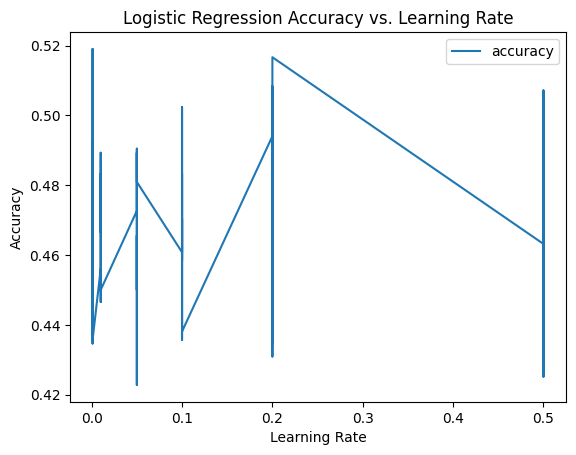

In [ ]:
results_df.plot(x='learning_rate', y='accuracy')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy vs. Learning Rate')
plt.show()